In [18]:
import json

with open("/Users/egor/Documents/code/ml-email-search/reports/search_time.json", "r") as file:
    timings = json.load(file)

In [26]:
import json
import matplotlib.pyplot as plt
import typing as tp

def plot_search_time_comparison(timings: tp.Dict[str, float]) -> None:
    """Plot search time comparison in queries per second."""
    index_data = {}
    for key, timing in timings.items():
        parts = key.split('_')
        index_name = parts[0].split(':')[1]
        corpus_size = int(parts[1].split(':')[1])
        k = int(parts[2].split(':')[1])
        n_queries = int(parts[3].split(':')[1])
        
        queries_per_second = n_queries / timing if timing > 0 else 0
        
        if index_name not in index_data:
            index_data[index_name] = {}
        if corpus_size not in index_data[index_name]:
            index_data[index_name][corpus_size] = {}
        index_data[index_name][corpus_size][k] = queries_per_second
    
    for index_name, size_timings in index_data.items():
        fig, ax = plt.subplots(figsize=(10, 6))
        for corpus_size, k_timings in size_timings.items():
            k_values = sorted(k_timings.keys())
            qps_values = [k_timings[k] for k in k_values]
            ax.plot(k_values, qps_values, "o-", label=f"Corpus Size: {corpus_size}", linewidth=2, markersize=6)
        ax.set_xlabel("k")
        ax.set_ylabel("Queries per Second")
        ax.set_title(f"Search Performance - {index_name}")
        ax.grid(True, alpha=0.3)
        ax.legend()
        plt.savefig(f"search_time_comparison_{index_name}.png", dpi=300, bbox_inches="tight")
        plt.show()

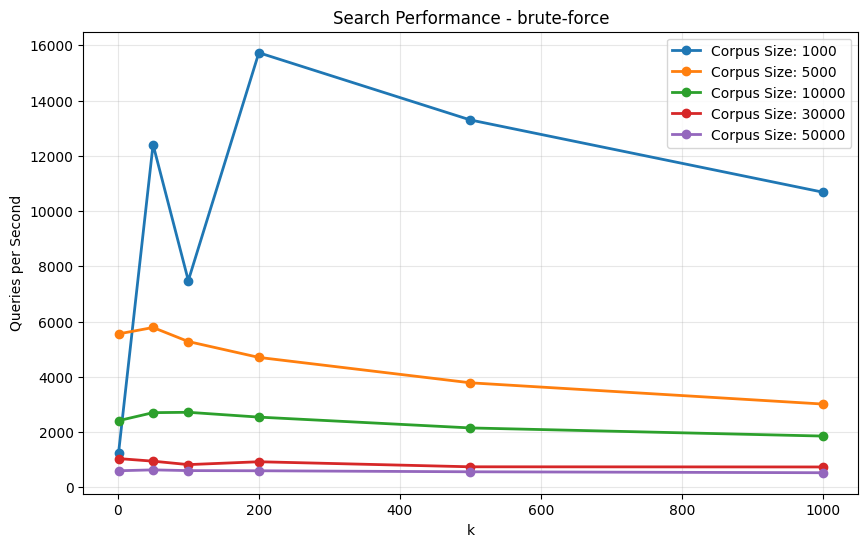

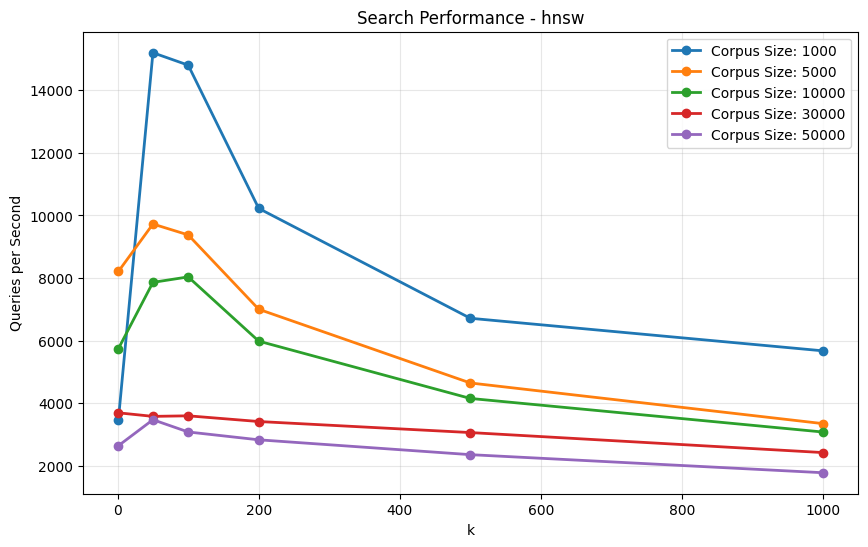

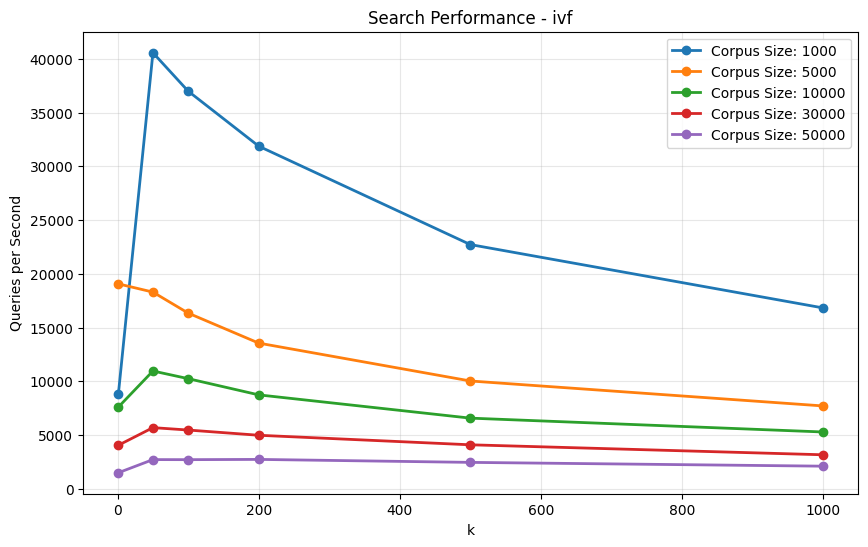

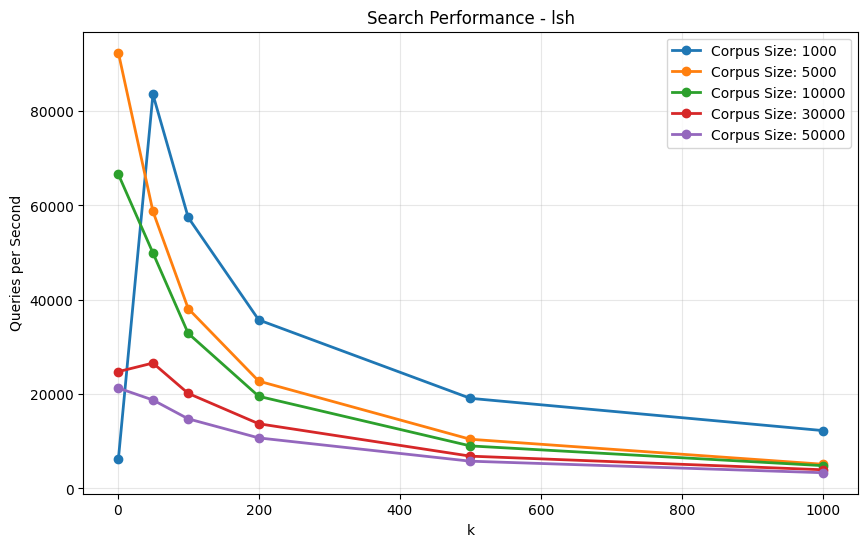

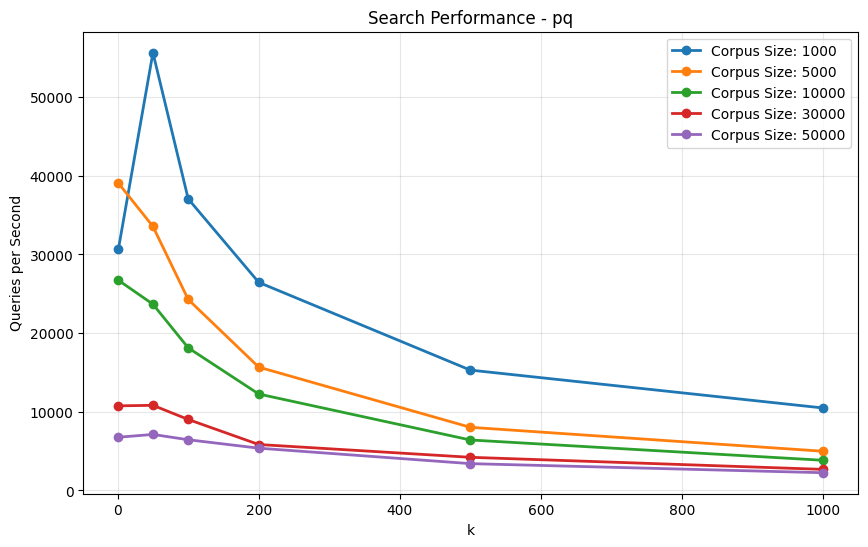

In [27]:
plot_search_time_comparison(timings)